<a href="https://colab.research.google.com/github/12sam158/tf2019/blob/master/TMDB_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import data files from repository
!wget https://raw.githubusercontent.com/12sam158/tf2019/master/test.csv
!wget https://raw.githubusercontent.com/12sam158/tf2019/master/train.csv
      

--2019-04-29 16:02:02--  https://raw.githubusercontent.com/12sam158/tf2019/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41864158 (40M) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>]  39.92M   168MB/s    in 0.2s    

2019-04-29 16:02:03 (168 MB/s) - ‘test.csv.1’ saved [41864158/41864158]

--2019-04-29 16:02:03--  https://raw.githubusercontent.com/12sam158/tf2019/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28308747 (27M) [text/plain]
Saving to: ‘train.csv.1’

train.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
#Create pandas dataframes for test and train
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [0]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [0]:
train.shape

(3000, 23)

In [0]:
test.shape

(4398, 22)

In [0]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [0]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [0]:
# identify areas of high null values
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [0]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

# Data Cleaning

In [0]:
# Break MM/DD/YY column into individual day, month and year columns
train['release_month']=pd.to_datetime(train['release_date']).dt.month
train['release_day']=pd.to_datetime(train['release_date']).dt.day
train['release_year']=pd.to_datetime(train['release_date']).dt.year

test['release_month']=pd.to_datetime(test['release_date']).dt.month
test['release_day']=pd.to_datetime(test['release_date']).dt.day
test['release_year']=pd.to_datetime(test['release_date']).dt.year


In [0]:
# Assitance from this kernelhttps://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme 
# Fixes years changed to 4 year form that are above 2019
train['release_year']=np.where(train['release_year'] > 2019, train['release_year']-100, train['release_year'])
test['release_year']=np.where(test['release_year'] > 2019, test['release_year']-100, test['release_year'])

In [0]:
# Create day of the week column
train['release_dow']=pd.to_datetime(train['release_date']).dt.dayofweek
test['release_dow']=pd.to_datetime(test['release_date']).dt.dayofweek



In [0]:
# Observe amount of releases per year 
year=pd.DataFrame(train['release_year'])

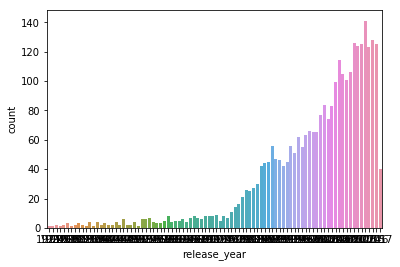

In [0]:
sns.countplot(x="release_year", data=year)

In [0]:
#Create final data frame with only numeric based columns for naive model
train_new=train[['id', 'budget', 'popularity',  'release_month', 'release_day', 'release_year', 'release_dow', 'revenue' ]]
train_new.head()

,id,budget,popularity,release_month,release_day,release_year,release_dow,revenue
0,1,14000000,6.575393,2,20,2015,4,12314651
1,2,40000000,8.248895,8,6,2004,4,95149435
2,3,3300000,64.299990,10,10,2014,4,13092000
3,4,1200000,3.174936,3,9,2012,4,16000000
4,5,0,1.148070,2,5,2009,3,3923970


In [0]:
test_new=test[['id', 'budget', 'popularity', 'release_month', 'release_day', 'release_year', 'release_dow']]

# Linear Regression

In [0]:
#Create train test split 
y=train_new.revenue.apply(np.log1p)

X=train_new[['id', 'budget', 'popularity',  'release_month', 'release_day', 'release_year', 'release_dow']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2100, 7) (900, 7) (2100,) (900,)


In [0]:
X_train.head()

,id,budget,popularity,release_month,release_day,release_year,release_dow
1658,1659,0,1.773963,6,25,2007,0
1525,1526,777000,8.152085,3,11,1971,3
1056,1057,2500000,3.750365,12,10,2008,2
150,151,0,1.178642,12,12,1980,4
91,92,0,3.831960,3,16,2001,4


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm=LinearRegression()

In [0]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
prediction=lm.predict(X_test)

In [0]:
print('R2 for Train', lm.score(X_train, y_train))
print('R2 for test', lm.score(X_test, y_test))

R2 for Train 0.26427020718157157
R2 for test 0.25361362074799154


# Lasso Regression

In [0]:
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [0]:
X.shape

(3000, 7)

In [0]:
L=LassoCV(alphas = [10,  1, 0.1, 0.01, 0.001]).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
LP=L.predict(X_test)

In [0]:
print("R2 Score:", L.score(X_train, y_train))
print("R2 Score:", L.score(X_test, y_test))

R2 Score: 0.2611260803810561
R2 Score: 0.2486626563809895


# Ridge Regressions

In [0]:
from sklearn.linear_model import Ridge, RidgeCV

In [0]:
R=RidgeCV(alphas=[100, 75, 50, 25, 10 , 1 ,0.1]).fit(X_train, y_train)

In [0]:
RP=R.predict(X_test)
RP

array([  9.59427769,   0.62577312,  82.76041129,   8.71358263,
         1.35472688,   8.09548505,   1.84606065,   5.50034822,
         1.3659182 ,   0.65983952,   8.98328819, 108.4848884 ,
        57.68800614,   4.54745644,  15.34267351,  29.77120384,
        22.79934523,   1.42029265,  11.20592407,  10.69695637,
         3.70121013,   1.056399  , 102.38364024,   0.74636784,
         2.35249618,   1.07001131,  58.18778574,   1.19519562,
         0.85112004,  21.08792148,   2.77465649,   6.06507096,
        12.53658703,  17.60036984,   2.19403749,   0.92499106,
         1.11740266,   4.13238517,   7.48601181,   3.8397391 ,
        27.43315534,  16.21885971,   0.9597204 ,   1.89885347,
         0.99025658,   1.65725974,   8.50477975,   1.39816112,
         1.76295952,   4.34431919,   6.89672415,   4.25781237,
         4.16876803,  19.05078709,  64.61966807,   2.4042424 ,
         3.15800867,   1.44871265,  17.7541836 ,   1.04479973,
         4.22037965,   1.36978789,   8.6917663 ,  39.08

In [0]:
print("R2 Score:", R.score(X_train, y_train))
print("R2 Score:", R.score(X_test, y_test))

R2 Score: -53.530820456874075
R2 Score: -44.14852804278685
